In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import subprocess
import pickle as pkl

Graphs to produce:  
- comparison of all script runtimes
- comparison of slow scripts across changing lattice steps/size
- comparison of fast scripts across changing lattice steps/size (size = linear -> cant be parallelised/accelerated)
- comparison of mpi number of threads
- comparison of parallel cython number of threads
- comparison of cython vs parallel cython?
- comparison of numba vs parallel numba?
- comparison of mpi vs cythonised mpi (speed ups due to cython, not mpi)

In [15]:
output = subprocess.run(["python", "NumbaLebwohlLasher.py", "50", "50", "0.5", "50"], capture_output=True)
output = str(output)
output

"CompletedProcess(args=['python', 'NumbaLebwohlLasher.py', '50', '50', '0.5', '50'], returncode=0, stdout=b'Figure(640x480)\\nNumbaLebwohlLasher.py: Size: 50, Steps: 50, T*: 0.500: Order: 0.421, Time: 0.119565 s\\nFigure(640x480)\\nFigure(640x480)\\nFigure(640x480)\\n', stderr=b'')"

In [20]:
time_value = output.split("Time: ")[1][:7]
time_value

'0.11956'

### Comparison of all scripts

In [ ]:
#  expanded 22/02

try:
    with open('all_scripts.pkl', 'rb') as handle:
        all_scripts = pkl.load(handle)
        
except:
    scripts = ["LebwohlLasher.py", "NumpyVecLebwohlLasher.py", "NumbaLebwohlLasher.py", "run_cython.py", "run_cython.py", "mpi4pyLebwohlLasher.py"]
    lattice_sizes = [25, 50, 100, 150, 200]

    all_scripts = {}
    for script in scripts:
        print(f"RUNNING {script}")
        times = []
        for size in lattice_sizes:
            print(f"lattice side length: {size}")
            if script == scripts[-1]:
                output = str( subprocess.run(["mpiexec", "-n", "4", "python", script, "100", f"{size}", "0.5", "0"], capture_output=True) )
            else:
                output = str( subprocess.run(["python", script, "100", f"{size}", "0.5", "0"], capture_output=True) )
                
            time_value = float(output.split("Time: ")[1][:7])
            print( time_value )
            times.append(time_value)
        print(f"times: {times}")
        all_scripts[script] = times
    
    print("dumping")
    with open('all_scripts.pkl', 'wb') as handle:
        pkl.dump(all_scripts, handle, protocol=pkl.HIGHEST_PROTOCOL)
        
    print("loading")
    with open('all_scripts.pkl', 'rb') as handle:
        all_scripts = pkl.load(handle)

RUNNING LebwohlLasher.py
lattice side length: 25
1.64924
lattice side length: 50
7.75522
lattice side length: 100
27.241
lattice side length: 150
68.9549
lattice side length: 200
121.59
times: [1.64924, 7.75522, 27.241, 68.9549, 121.59]
RUNNING NumpyVecLebwohlLasher.py
lattice side length: 25
0.10494
lattice side length: 50
0.19452
lattice side length: 100
0.53857
lattice side length: 150
1.57728
lattice side length: 200
2.44254
times: [0.10494, 0.19452, 0.53857, 1.57728, 2.44254]
RUNNING NumbaLebwohlLasher.py
lattice side length: 25
0.14674
lattice side length: 50
0.21582
lattice side length: 100
0.42013
lattice side length: 150
0.7599
lattice side length: 200
2.18873
times: [0.14674, 0.21582, 0.42013, 0.7599, 2.18873]
RUNNING run_cython.py
lattice side length: 25
0.08449
lattice side length: 50
0.35135
lattice side length: 100
1.31759
lattice side length: 150
3.09659
lattice side length: 200
5.19677
times: [0.08449, 0.35135, 1.31759, 3.09659, 5.19677]
RUNNING mpi4pyLebwohlLasher.py
l

Text(0, 0.5, 'Time of simulation / s')

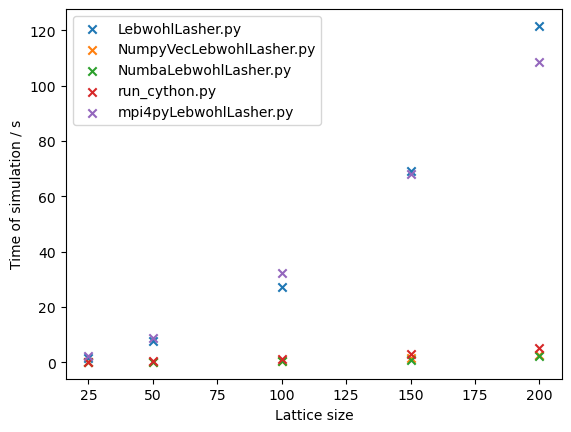

In [68]:
fig, ax = plt.subplots()
for label, times in all_scripts.items():
    ax.scatter(lattice_sizes, times, label=label, marker='x')
    
ax.legend()
ax.set_xlabel("Lattice size")
ax.set_ylabel("Time of simulation / s")

### MPI vs normal 

Plot to show that MPI only improves on base script if lattice is large - needs each worker to have plenty of calculations to do otherwise the gain from parallisation is diminished by the overhead of sending between workers. 

In [79]:
slow_scripts = ["mpi4pyLebwohlLasher.py", "LebwohlLasher.py"]

In [ ]:
import pickle as pkl

# with open('mpi_vs_base_lattice_size.pkl', 'wb') as handle:
#     pkl.dump(mpi_vs_base_lattice_size, handle, protocol=pkl.HIGHEST_PROTOCOL)

try:
    with open('mpi_vs_base_lattice_size.pkl', 'rb') as handle:
        mpi_vs_base_lattice_size = pkl.load(handle)
        
except:
    print("EXCEPT")
    lattice_sizes = [50, 100, 150, 250]

    mpi_vs_base_lattice_size = {}
    for script in slow_scripts:
        print(f"RUNNING {script}")
        times = []
        for size in lattice_sizes:
            print(f"lattice side length: {size}")
            if script == "mpi4pyLebwohlLasher.py":
                output = str( subprocess.run(["mpiexec", "-n", "4", "python", script,  "50", f"{size}","0.5", "0"], capture_output=True) )
            else:
                output = str( subprocess.run(["python", script, "50", f"{size}","0.5", "0"], capture_output=True) )
                
            time_value = float(output.split("Time: ")[1][:7])
            print( time_value )
            times.append(time_value)
        print(f"times: {times}")
        mpi_vs_base_lattice_size[script] = times

    print("dumping")
    with open('mpi_vs_base_lattice_size.pkl', 'wb') as handle:
        pkl.dump(mpi_vs_base_lattice_size, handle, protocol=pkl.HIGHEST_PROTOCOL)
        
    print("loading")
    with open('mpi_vs_base_lattice_size.pkl', 'rb') as handle:
        mpi_vs_base_lattice_size = pkl.load(handle)


EXCEPT
RUNNING mpi4pyLebwohlLasher.py
lattice side length: 50
3.01186
lattice side length: 100
11.5856
lattice side length: 150
26.0862
lattice side length: 250
73.7299
times: [3.01186, 11.5856, 26.0862, 73.7299]
RUNNING LebwohlLasher.py
lattice side length: 50
3.4573
lattice side length: 100
14.5588
lattice side length: 150
30.3288
lattice side length: 250
84.5507
times: [3.4573, 14.5588, 30.3288, 84.5507]
dumping
loading


In [75]:
try:
    with open('mpi_vs_base_steps.pkl', 'rb') as handle:
        mpi_vs_base_steps = pkl.load(handle)
        
except:
    print("EXCEPT")
    steps = [50, 100, 150, 250, 400]

    mpi_vs_base_steps = {}
    for script in slow_scripts:
        print(f"RUNNING {script}")
        times = []
        for step in steps:
            print(f"{step} steps")
            if script == "mpi4pyLebwohlLasher.py":
                output = str( subprocess.run(["mpiexec", "-n", "4", "python", script, f"{step}", "50", "0.5", "0"], capture_output=True) )
            else:
                output = str( subprocess.run(["python", script, f"{step}", "50", "0.5", "0"], capture_output=True) )
                
            time_value = float(output.split("Time: ")[1][:7])
            print( time_value )
            times.append(time_value)
        print(f"times: {times}")
        mpi_vs_base_steps[script] = times

    print("dumping")
    with open('mpi_vs_base_steps.pkl', 'wb') as handle:
        pkl.dump(mpi_vs_base_steps, handle, protocol=pkl.HIGHEST_PROTOCOL)
        
    print("loading")
    with open('mpi_vs_base_steps.pkl', 'rb') as handle:
        mpi_vs_base_steps = pkl.load(handle)

EXCEPT
RUNNING mpi4pyLebwohlLasher.py
50 steps
2.85406
100 steps
5.34013
150 steps
10.8939
250 steps
19.7877
400 steps
27.3429
times: [2.85406, 5.34013, 10.8939, 19.7877, 27.3429]
RUNNING LebwohlLasher.py
50 steps
3.67608
100 steps
8.04165
150 steps
11.835
250 steps
22.8877
400 steps
30.0268
times: [3.67608, 8.04165, 11.835, 22.8877, 30.0268]
dumping
loading


In [72]:
mpi_vs_base_lattice_size[script]

[3.4573, 14.5588, 30.3288, 84.5507]

Text(0, 0.5, 'Time / s')

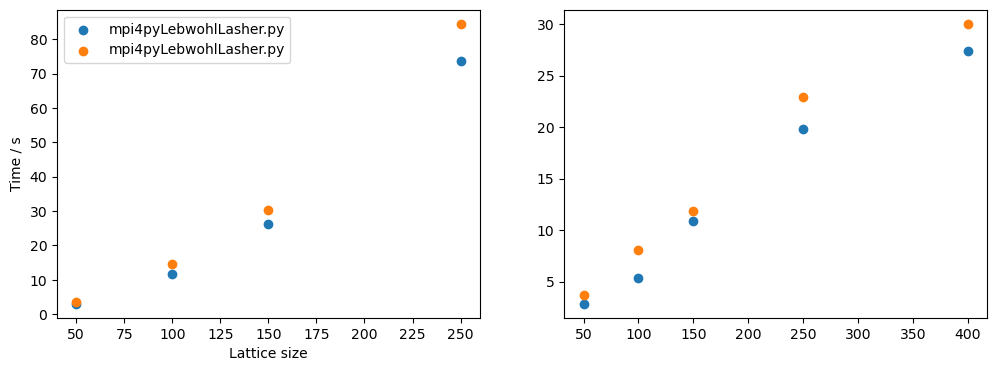

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
for script in slow_scripts:
    ax[0].scatter(lattice_sizes, mpi_vs_base_lattice_size[script], label=script, marker='x')
    ax[1].scatter(steps, mpi_vs_base_steps[script], label=script, marker='x')
    
ax[0].legend()
ax[0].set_xlabel("Lattice size")
ax[1].set_xlabel("Steps")
ax[0].set_ylabel("Time / s")

### fast scripts comparison

In [76]:
fast_scripts = ["NumpyVecLebwohlLasher.py", "NumbaLebwohlLasher.py", "run_cython.py"]

In [116]:
lattice_sizes = [25, 50, 100, 150, 200]
repeats = 5

# try:
#     with open('fast_scripts_lattice.pkl', 'rb') as handle:
#         fast_scripts_lattice = pkl.load(handle)
#     print("fast_scripts_lattice loaded in")
# except:
    
fast_scripts_lattice = {}
for script in fast_scripts:
    print(f"RUNNING {script}")
    times = np.zeros(len(lattice_sizes))
    stds = np.zeros(len(lattice_sizes))
    for i, size in enumerate(lattice_sizes):
        print(f"lattice side length: {size}")
        time_value_tot = 0
        time_value_reps = np.zeros(repeats)
        for j in range(repeats):
            output = str( subprocess.run(["python", script, "100", f"{size}", "0.5", "0"], capture_output=True) )
                
            time_value_reps[j] = float(output.split("Time: ")[1][:7])
            # print(f"time{i}: {time_value_rep}")
            
        av_time_value = np.mean(time_value_reps)
        std_time_value = np.std(time_value_reps)
        
        times[i] = (av_time_value)
        stds[i] = (std_time_value)
    print(f"times: {times}")
    print(f"stds: {stds}")
    fast_scripts_lattice[f"{script}_times"] = times
    fast_scripts_lattice[f"{script}_stds"] = stds

print("dumping")
with open('fast_scripts_lattice.pkl', 'wb') as handle:
    pkl.dump(fast_scripts_lattice, handle, protocol=pkl.HIGHEST_PROTOCOL)
    
print("loading")
with open('fast_scripts_lattice.pkl', 'rb') as handle:
    fast_scripts_lattice = pkl.load(handle)

RUNNING NumpyVecLebwohlLasher.py
lattice side length: 25
lattice side length: 50
lattice side length: 100
lattice side length: 150
lattice side length: 200
times: [0.066454 0.150394 0.503374 1.257438 2.283478]
stds: [0.00588261 0.01692299 0.01293889 0.00976334 0.02474762]
RUNNING NumbaLebwohlLasher.py
lattice side length: 25
lattice side length: 50
lattice side length: 100
lattice side length: 150
lattice side length: 200
times: [0.143912 0.219682 0.39718  0.67771  1.36134 ]
stds: [0.01289879 0.00650825 0.02014582 0.04526189 0.11942246]
RUNNING run_cython.py
lattice side length: 25
lattice side length: 50
lattice side length: 100
lattice side length: 150
lattice side length: 200
times: [0.077412 0.299464 1.171746 2.708862 4.810974]
stds: [0.00537617 0.00977079 0.04256406 0.06305204 0.29411656]
dumping
loading


In [101]:
open_bool = False

In [102]:
lattice_steps = [25, 50, 150, 250, 500, 1000]
repeats = 5

if open_bool:
    try:

        with open('fast_scripts_steps.pkl', 'rb') as handle:
            fast_scripts_steps = pkl.load(handle)

        print("fast_scripts_steps loaded in")
        
    except:
        fast_scripts_steps = {}
        for script in fast_scripts:
            print(f"RUNNING {script}")
            times = []
            stds = []
            for step in lattice_steps:
                print(f"{step} steps")
                time_value_tot = 0
                time_value_reps = []
                for i in range(repeats):
                    output = str( subprocess.run(["python", script, f"{step}", "50", "0.5", "0"], capture_output=True) )
                        
                    time_value_reps.append(float(output.split("Time: ")[1][:7]))
                    # time_value_tot += time_value_rep
                    
                av_time_value = np.mean(time_value_reps)
                std_time_value = np.std(time_value_reps)
                
                times.append(av_time_value)
                stds.append(std_time_value)
                
            print(f"times: {times}")
            print(f"stds: {stds}")
            fast_scripts_steps[f"{script}_times"] = times
            fast_scripts_steps[f"{script}_stds"] = stds
        
        print("dumping")
        with open('fast_scripts_steps.pkl', 'wb') as handle:
            pkl.dump(fast_scripts_steps, handle, protocol=pkl.HIGHEST_PROTOCOL)
            
        print("loading")
        with open('fast_scripts_steps.pkl', 'rb') as handle:
            fast_scripts_steps = pkl.load(handle)
            
else: 
    fast_scripts_steps = {}
    for script in fast_scripts:
        print(f"RUNNING {script}")
        times = np.zeros(len(lattice_steps))
        stds = np.zeros(len(lattice_steps))
        for i, step in enumerate(lattice_steps):
            print(f"{step} steps")
            time_value_tot = 0
            time_value_reps = np.zeros(repeats)
            for j in range(repeats):
                output = str( subprocess.run(["python", script, f"{step}", "50", "0.5", "0"], capture_output=True) )
                    
                time_value_reps[j] = (float(output.split("Time: ")[1][:7]))
                
            av_time_value = np.mean(time_value_reps)
            std_time_value = np.std(time_value_reps)
            
            times[i] = (av_time_value)
            stds[i] = (std_time_value)
            
        print(f"times: {times}")
        print(f"stds: {stds}")
        fast_scripts_steps[f"{script}_times"] = times
        fast_scripts_steps[f"{script}_stds"] = stds
    
    print("dumping")
    with open('fast_scripts_steps.pkl', 'wb') as handle:
        pkl.dump(fast_scripts_steps, handle, protocol=pkl.HIGHEST_PROTOCOL)
        
    print("loading")
    with open('fast_scripts_steps.pkl', 'rb') as handle:
        fast_scripts_steps = pkl.load(handle)
        
    open_bool = True

RUNNING NumpyVecLebwohlLasher.py
25 steps
50 steps
150 steps
250 steps
500 steps
1000 steps
times: [0.040172 0.076126 0.228254 0.35977  0.724664 1.536374]
stds: [0.00633731 0.00525844 0.01562744 0.01023857 0.01255396 0.06767714]
RUNNING NumbaLebwohlLasher.py
25 steps
50 steps
150 steps
250 steps
500 steps
1000 steps
times: [0.058316 0.117412 0.318102 0.55979  1.301492 2.484306]
stds: [0.00271894 0.00300757 0.01165226 0.03695749 0.20183215 0.0226885 ]
RUNNING run_cython.py
25 steps
50 steps
150 steps
250 steps
500 steps
1000 steps
times: [0.076288 0.152074 0.453026 0.761448 1.507706 3.035798]
stds: [0.00356409 0.00470959 0.01073863 0.01138638 0.02628172 0.02642386]
dumping
loading


Text(0, 0.5, 'Time / s')

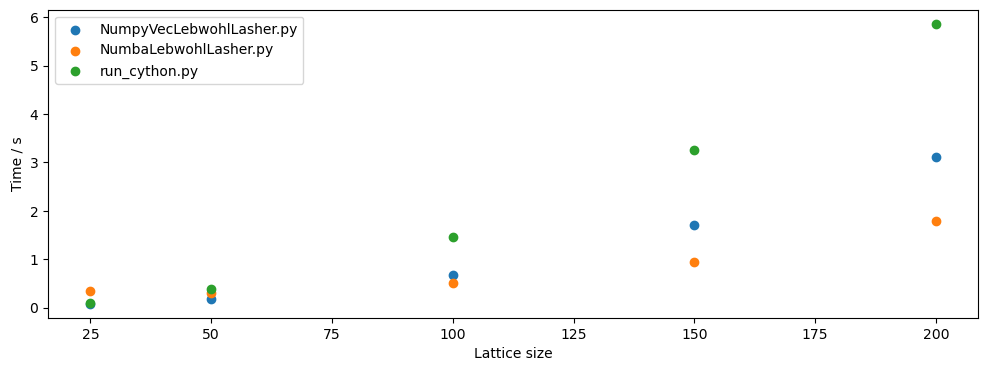

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
for script in fast_scripts:
    ax.scatter(lattice_sizes, fast_scripts_lattice[script], label=script, marker='x')
    
ax.legend()
ax.set_xlabel("Lattice size")
ax.set_ylabel("Time / s");

Text(0, 0.5, 'Time / s')

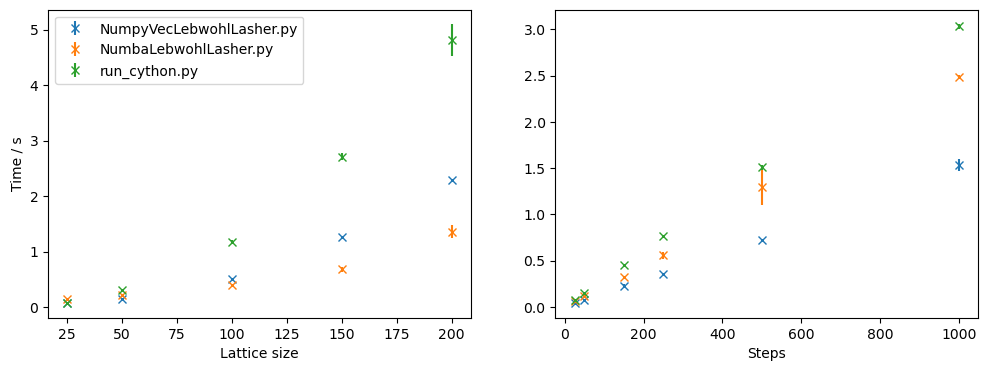

In [117]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
for script in fast_scripts:
    ax[0].errorbar(lattice_sizes, fast_scripts_lattice[f"{script}_times"], yerr=fast_scripts_lattice[f"{script}_stds"], linestyle="", label=script, marker='x')
    ax[1].errorbar(lattice_steps, fast_scripts_steps[f"{script}_times"], yerr=fast_scripts_steps[f"{script}_stds"], linestyle="", label=script, marker='x')
    
ax[0].legend()
ax[0].set_xlabel("Lattice size")
ax[1].set_xlabel("Steps")
ax[0].set_ylabel("Time / s")